# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Imam Hanif Mulyarahman (13522030)
- Bryan Cornelius Lauwrence (13522033)
- Amalia Putri (13522042)
- Konstan Aftop Anewata Ndruru (12822058)

## Import Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Import other libraries if needed

## Import Dataset

In [15]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df_description = pd.read_csv('https://drive.google.com/uc?id=1NUpqAu4kSckOZ098NioDMX0Y4NseDgSt')

df_flow_features = pd.read_csv('https://drive.google.com/uc?id=1WJPAohuba5Er-JpH075OFp7NoxdoNOgc')
df_basic_features = pd.read_csv('https://drive.google.com/uc?id=1tw6Icqirk3LCm9wibybBQU3znhVvs2WU')
df_content_features = pd.read_csv('https://drive.google.com/uc?id=1G4vyxXnOszbKIbAtwhBOyh4r9GxPwwQY')
df_time_features = pd.read_csv('https://drive.google.com/uc?id=1Zf7BjEHGaDO6mPFTcH3ExWr3IAgbYcVw')
df_additional_features = pd.read_csv('https://drive.google.com/uc?id=197G_ECGO8jQUQiaHFyVmBayz31NRKppX')
df_labels = pd.read_csv('https://drive.google.com/uc?id=1wQ6Q8zlxjH-eDfhnCR6I1o-bos07diJf')

In [16]:
array_features = [df_additional_features, df_basic_features, df_content_features, df_flow_features, df_labels, df_time_features]
train = array_features[0]

for file in array_features[1:]:
  train = pd.merge(train, file, on='id')

train.head()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,proto,attack_cat,label,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,tcp,Normal,0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,udp,Generic,1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,tcp,Exploits,1,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,tcp,Normal,0,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,udp,Normal,0,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Column Descriptions

|  Name | Description |
| --- | --- |
| proto  | Transaction protocol
| state | Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)
| dur | Record total duration
| sbytes | Source to destination transaction bytes 
| dbytes | Destination to source transaction bytes
| sttl | Source to destination time to live value 
| dttl | Destination to source time to live value
| sloss | Source packets retransmitted or dropped 
| dloss | Destination packets retransmitted or dropped
| service | http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service
| sload | Source bits per second
| dload | Destination bits per second
| spkts | Source to destination packet count 
| dpkts | Destination to source packet count
| swin | Source TCP window advertisement value
| dwin | Destination TCP window advertisement value
| stcpb | Source TCP base sequence number
| dtcpb | Destination TCP base sequence number
| smean | Mean of the row packet size transmitted by the src 
| dmean | Mean of the row packet size transmitted by the dst 
| trans_depth | Represents the pipelined depth into the connection of http request/response transaction
| response_body_len | Actual uncompressed content size of the data transferred from the server's http service.
| sjit | Source jitter (mSec)
| djit | Destination jitter (mSec)
| sinpkt | Source interpacket arrival time (mSec)
| dinpkt | Destination interpacket arrival time (mSec)
| tcprtt | TCP connection setup round-trip time, the sum of synack and ackdat.
| synack | TCP connection setup time, the time between the SYN and the SYN_ACK packets.
| ackdat | TCP connection setup time, the time between the SYN_ACK and the ACK packets.
| is_sm_ips_ports | If source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0
| ct_state_ttl | No. for each state (6) according to specific range of values for source/destination time to live (10) (11).
| ct_flw_http_mthd | No. of flows that has methods such as Get and Post in http service.
| is_ftp_login | If the ftp session is accessed by user and password then 1 else 0. 
| ct_ftp_cmd | No of flows that has a command in ftp session.
| ct_srv_src | No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).
| ct_srv_dst | No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).
| ct_dst_ltm | No. of connections of the same destination address (3) in 100 connections according to the last time (26).
| ct_src_ltm | No. of connections of the same source address (1) in 100 connections according to the last time (26).
| ct_src_dport_ltm | No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).
| ct_dst_sport_ltm | No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).
| ct_dst_src_ltm | No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).
| attack_cat | The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms
| label | 0 for normal and 1 for attack records

### Step 1
1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.

In [17]:
# Size of the data
print("Size of the data:", train.shape)

Size of the data: (175341, 44)


In [18]:
# Data types
train['label'] = train['label'].astype(object)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    166595 non-null  float64
 1   ct_state_ttl       166706 non-null  float64
 2   ct_flw_http_mthd   166694 non-null  float64
 3   is_ftp_login       166694 non-null  float64
 4   ct_ftp_cmd         166499 non-null  float64
 5   ct_srv_src         166490 non-null  float64
 6   ct_srv_dst         166567 non-null  float64
 7   ct_dst_ltm         166603 non-null  float64
 8   ct_src_ltm         166518 non-null  float64
 9   ct_src_dport_ltm   166566 non-null  float64
 10  ct_dst_sport_ltm   166553 non-null  float64
 11  ct_dst_src_ltm     166446 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              166536 non-null  object 
 14  dur                166619 non-null  float64
 15  sbytes             166780 non-null  float64
 16  db

In [19]:
# Number of unique values in each column
train.nunique()

is_sm_ips_ports           2
ct_state_ttl              5
ct_flw_http_mthd         11
is_ftp_login              4
ct_ftp_cmd                4
ct_srv_src               52
ct_srv_dst               52
ct_dst_ltm               50
ct_src_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm         32
ct_dst_src_ltm           54
id                   175341
state                     9
dur                   70713
sbytes                 6997
dbytes                 6432
sttl                     11
dttl                      6
sloss                   394
dloss                   365
service                  13
sload                 77315
dload                 73756
spkts                   470
dpkts                   432
swin                     11
dwin                      7
stcpb                 71744
dtcpb                 71536
smean                  1356
dmean                  1322
trans_depth              11
response_body_len      2327
proto                   133
attack_cat          

In [20]:
# Descriptive statistics for each column
train.describe()

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166595.000000,166706.000000,166694.000000,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,...,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,0.015799,1.303852,0.132722,0.014974,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,...,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,0.124697,0.954779,0.692019,0.126338,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,...,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,...,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,...,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,1.000000,6.000000,30.000000,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,...,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


### Step 2
1. Missing values for each feature.
2. Outliers for each feature.

In [21]:
# Check for missing values
train.isnull().sum()

is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
label                   0
sjit                 8738
djit        

In [22]:
# Check for outliers with boxplots
def plot_boxplots_grid(dataframe, n_cols=3, subplot_size=(5, 3)):
    """
    Plots a grid of boxplots for all numerical non-binary columns in a DataFrame.

    :param dataframe: pandas DataFrame to plot.
    :param n_cols: Number of columns in the grid.
    :param subplot_size: Size of each subplot (width, height).
    """
    # Identify numerical columns that are not binary (more than 2 unique values)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and dataframe[col].nunique() > 2]

    # Determine the grid size (number of rows and columns in the grid)
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Computes the required number of rows

    # Create a figure with subplots in a grid
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
        sns.boxplot(y=dataframe[col])
        plt.title(col)
    plt.tight_layout()  # Adjusts the subplots to fit in the figure area
    plt.show()


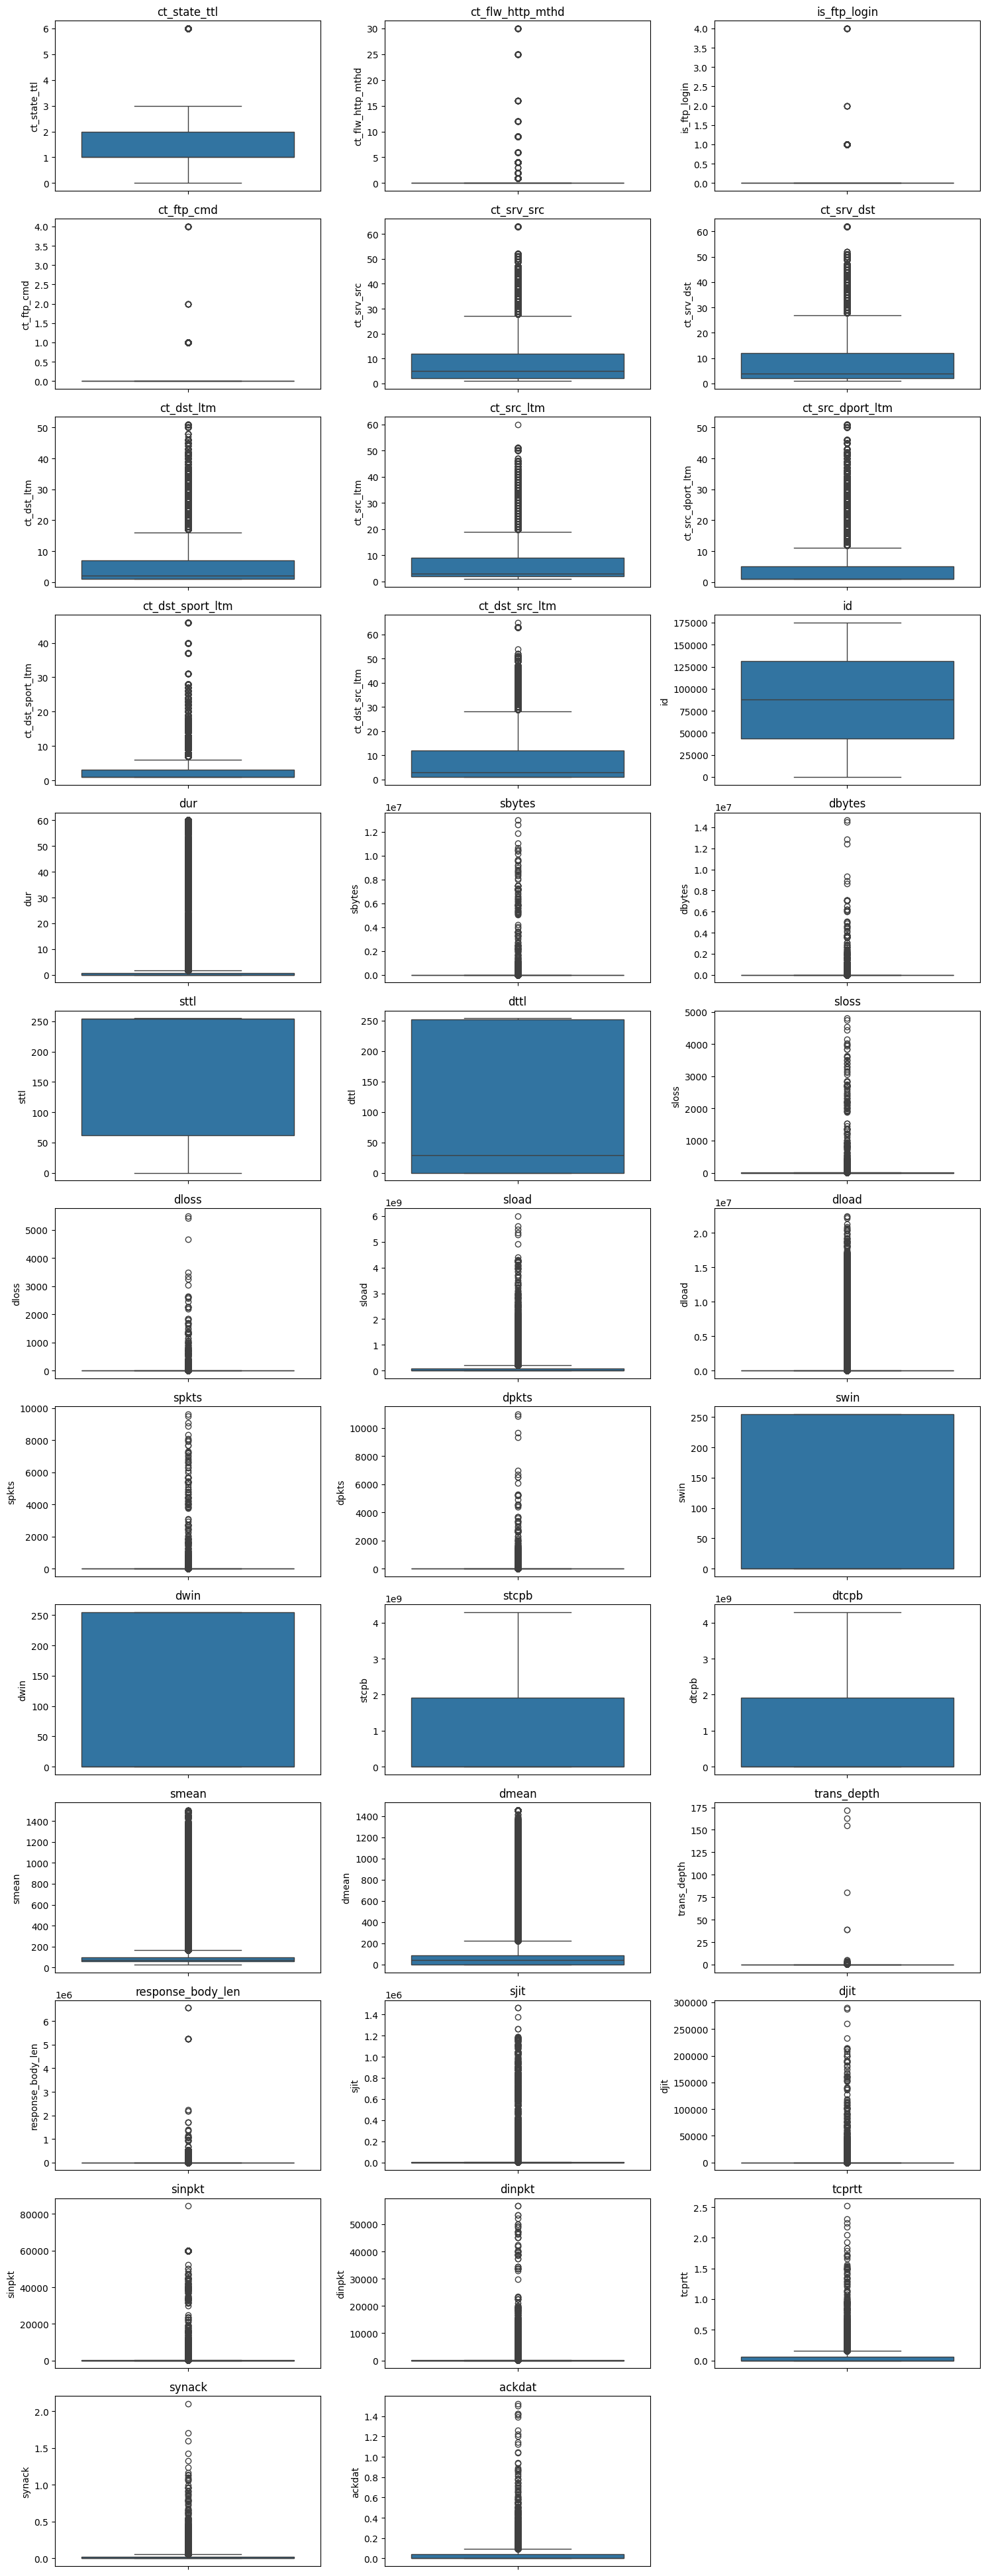

In [23]:
plot_boxplots_grid(train)

### Step 3
1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.

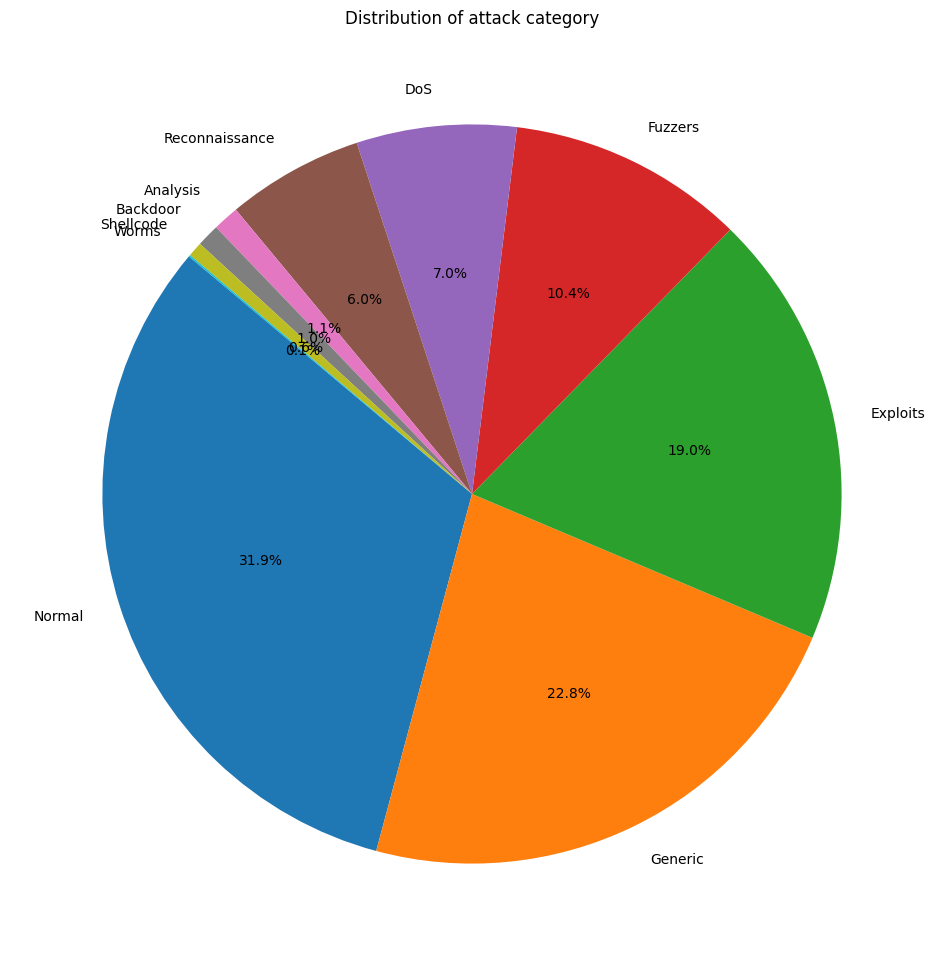

In [24]:
# Plot the distribution for target column
def plot_attack_distribution(data, column='attack_cat'):
    """
    Plots the distribution of the churn label in a pie chart.

    :param data: DataFrame containing the customer data.
    :param column: Name of the column containing the churn label.
    """
    # Calculating the distribution
    attack_dist = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(16, 12))
    plt.pie(attack_dist, labels=attack_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of attack category')
    plt.show()

# Testing the function with the customer data
plot_attack_distribution(train)

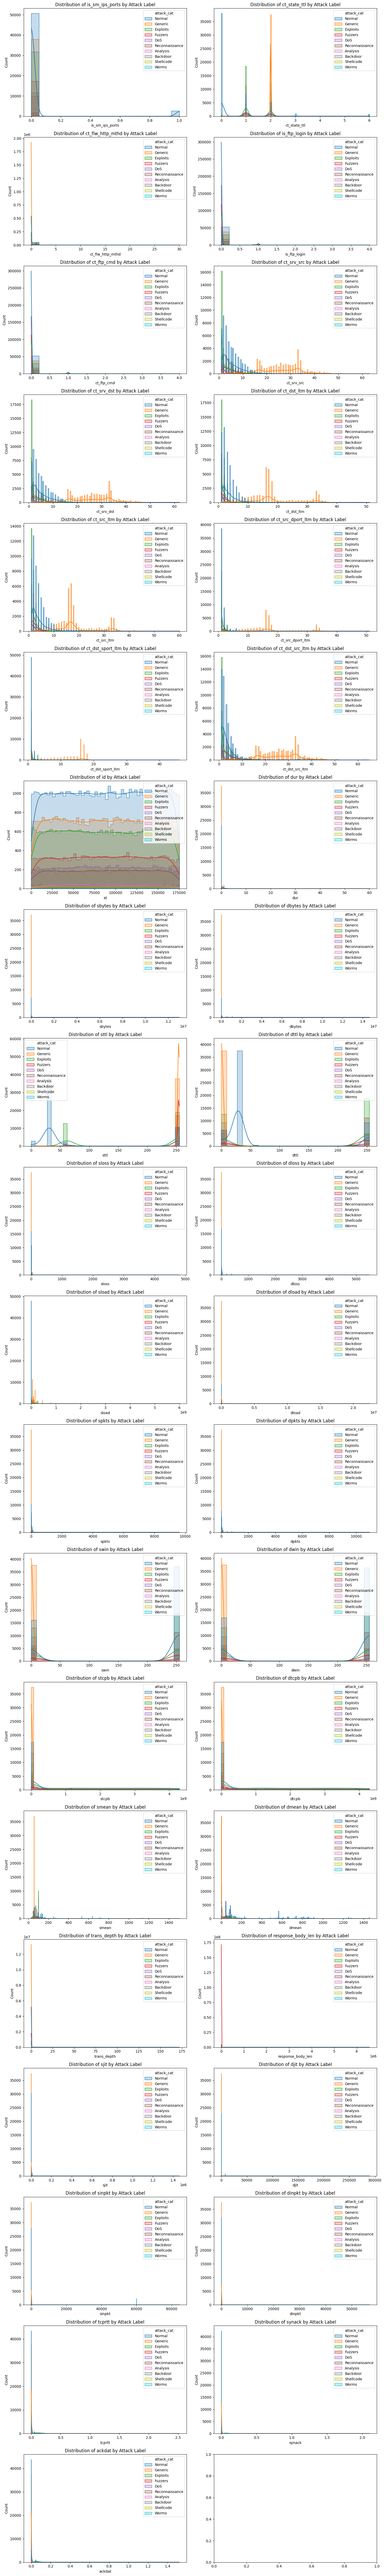

In [25]:
# Plot the distribution for each numerical columns based on the attack_cat label
def plot_numerical_distribution_by_attackcat(data, attack_cat='attack_cat'):
    """
    Plots the distribution of each numerical column in the data, separated by attack cat label.

    :param data: DataFrame containing the customer data.
    :param attack_cat: Name of the column containing the attack cat label.
    """
    # Identifying numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Number of rows and columns for the subplot
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols

    # Creating subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plotting each numerical column
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, hue=attack_cat, ax=axes[i], kde=True, element='step')
        axes[i].set_title(f'Distribution of {col} by Attack Label')
        axes[i].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()
plot_numerical_distribution_by_attackcat(train)

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [26]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train, test_size=0.2, random_state=42)

In [27]:
train_set.shape, val_set.shape

((140272, 44), (35069, 44))

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [28]:
for column in train.columns:
    if train[column].dtype == 'object':  # If the column is categorical (object type)
        train[column] = train[column].fillna(train[column].mode()[0])  # Impute with mode
    else:  # If the column is numerical (int or float)
        train[column] = train[column].fillna(train[column].mean())  # Impute with mean


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

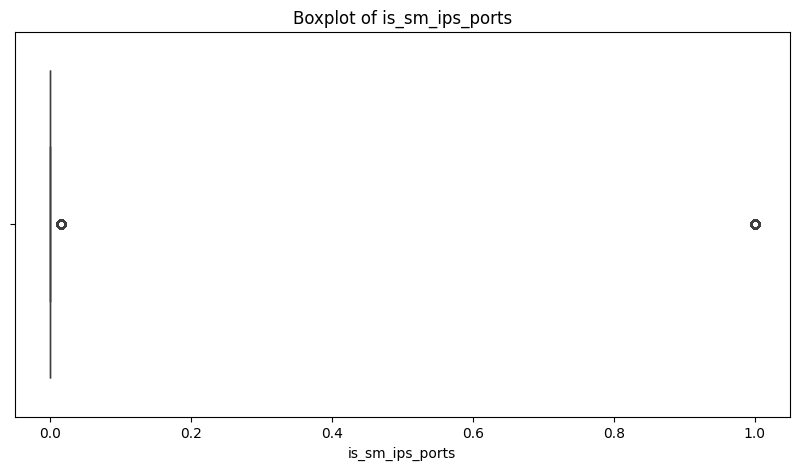

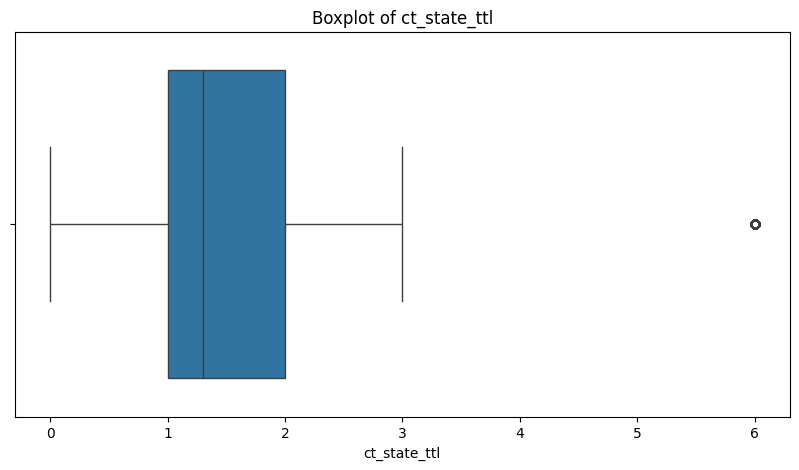

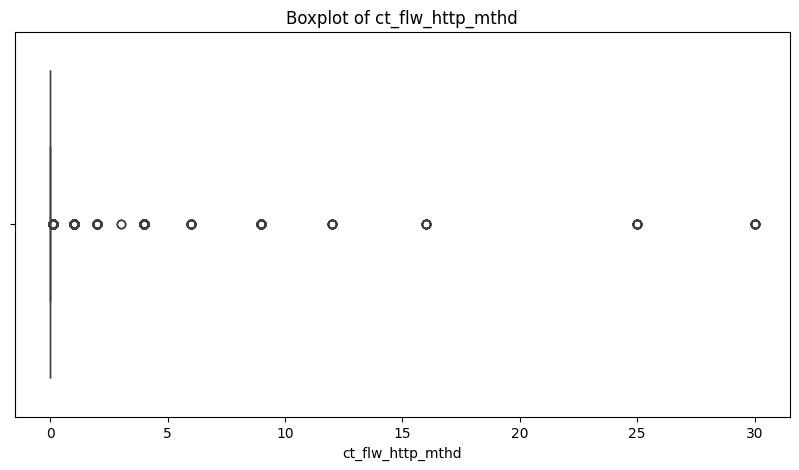

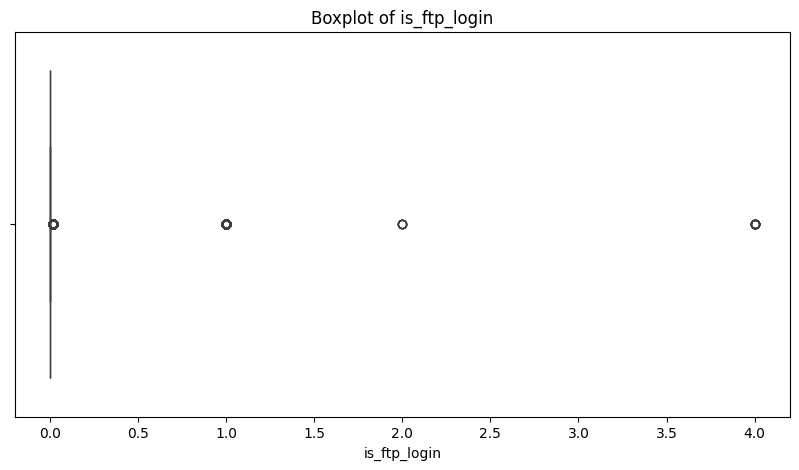

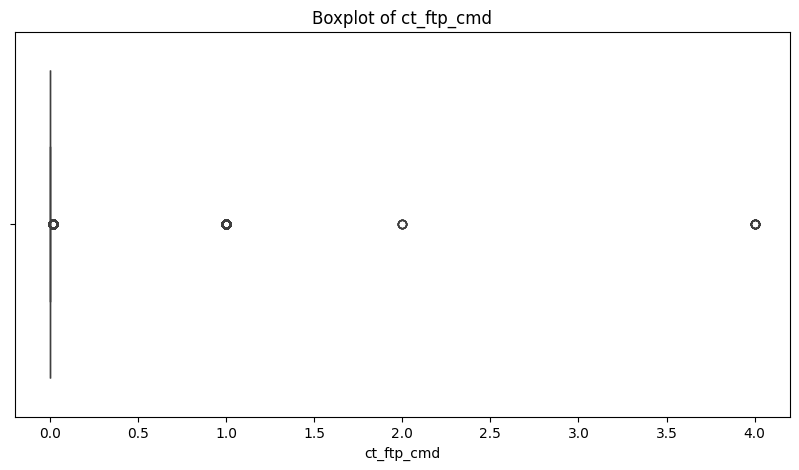

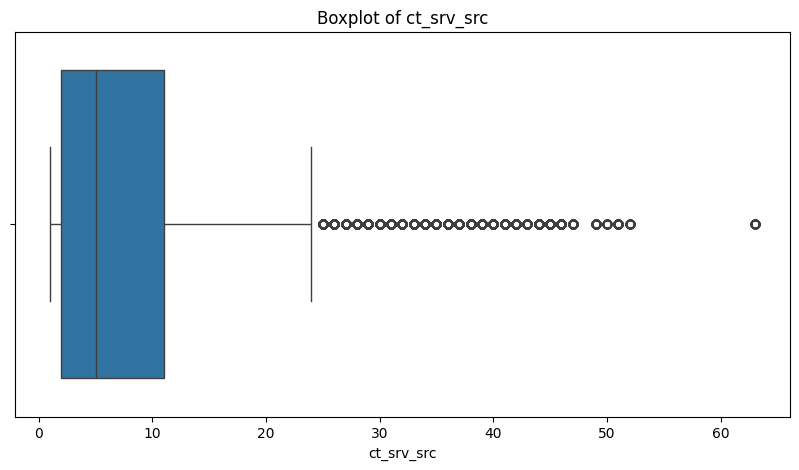

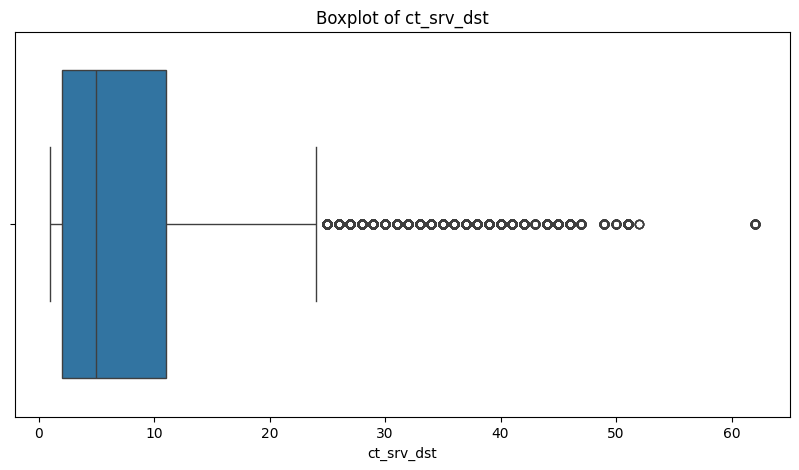

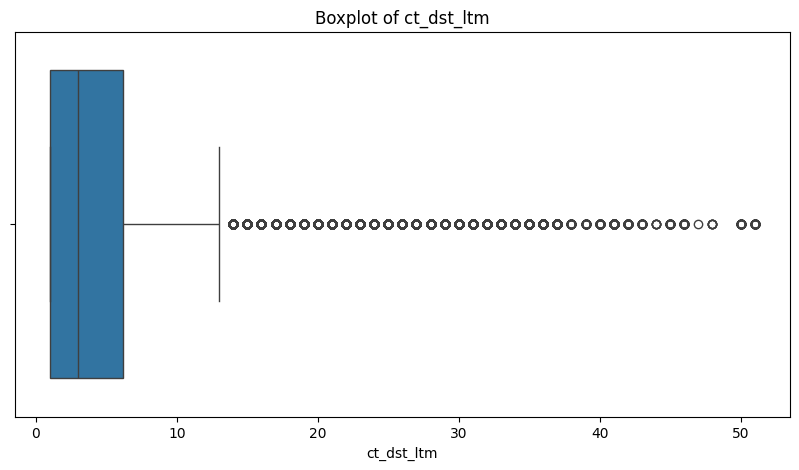

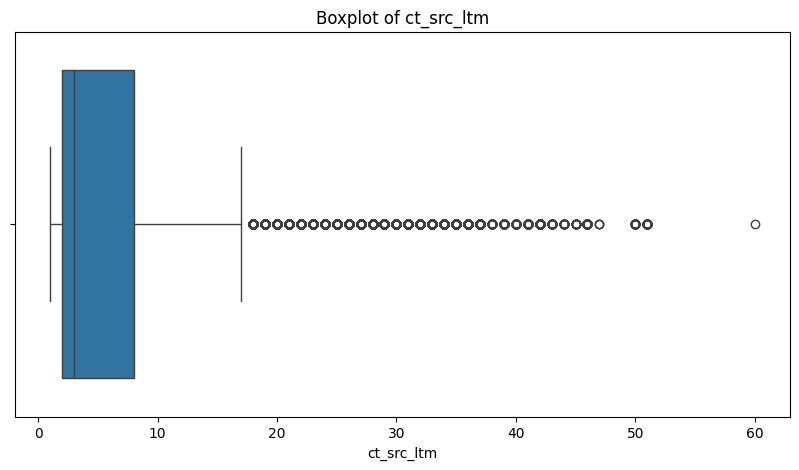

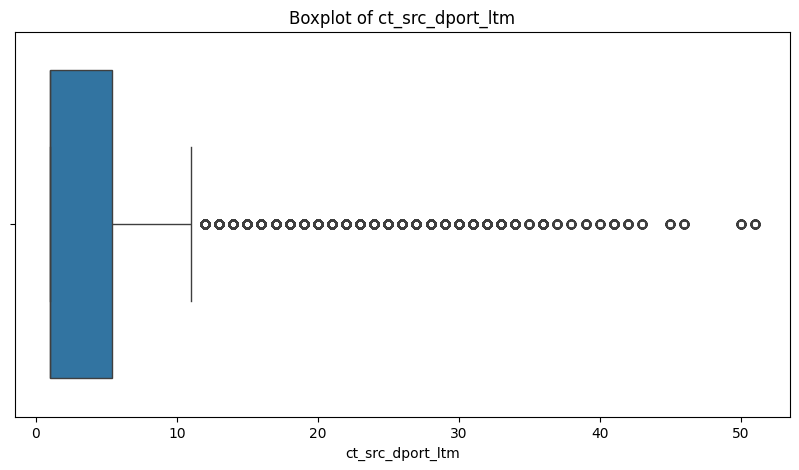

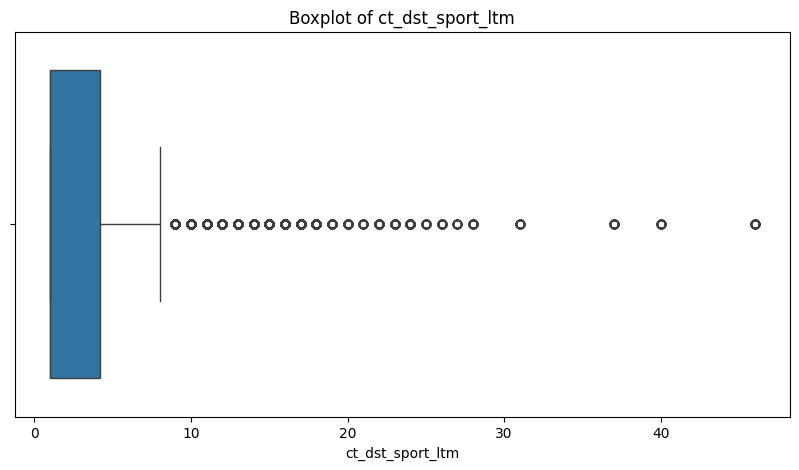

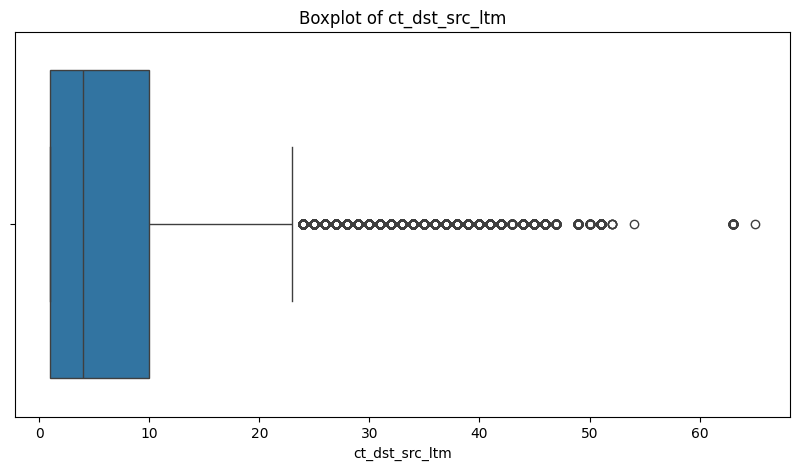

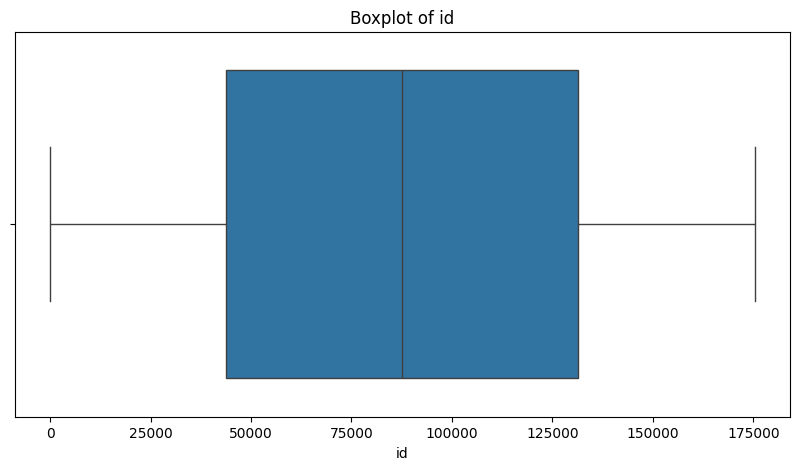

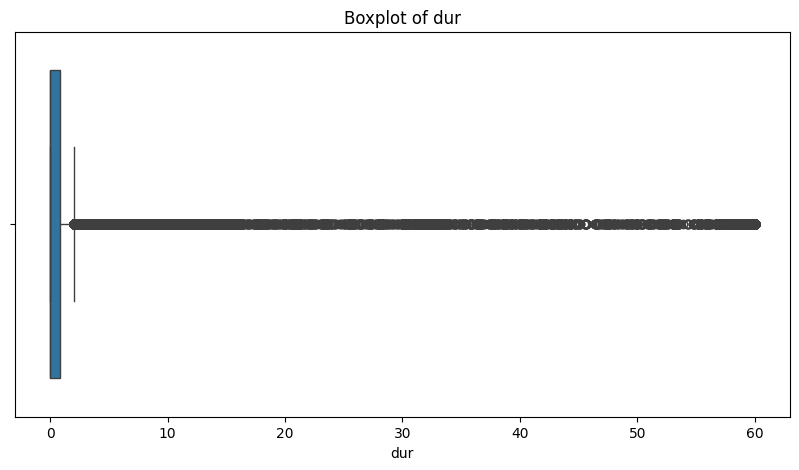

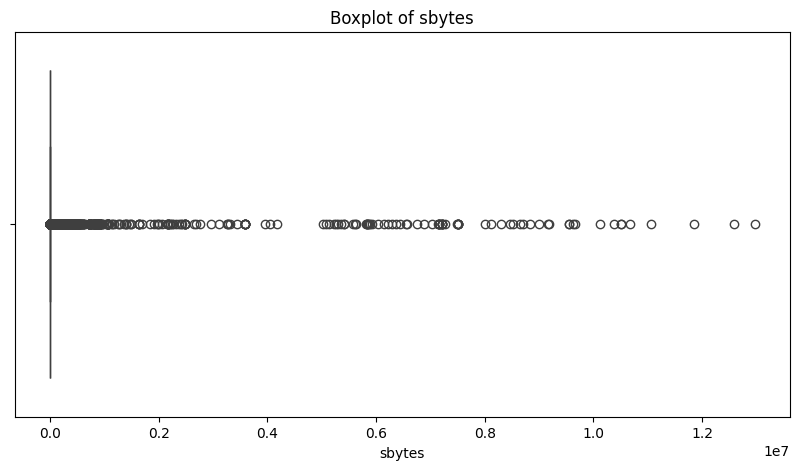

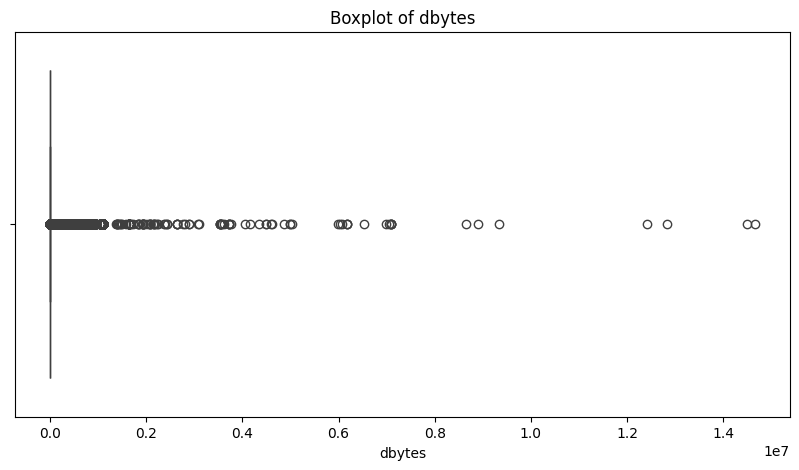

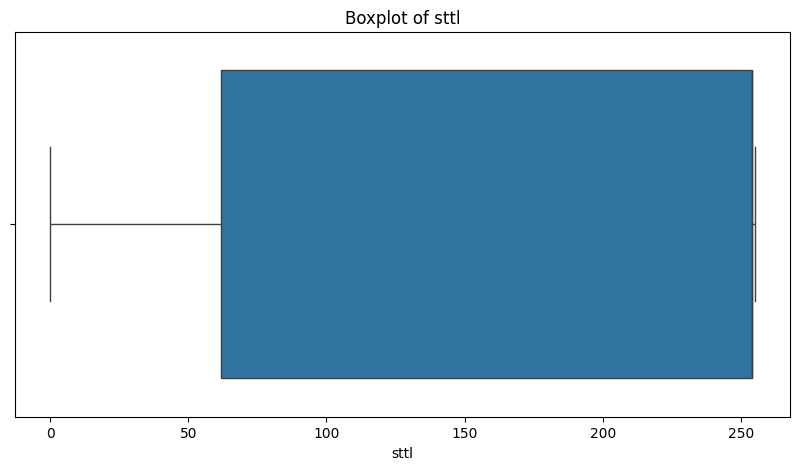

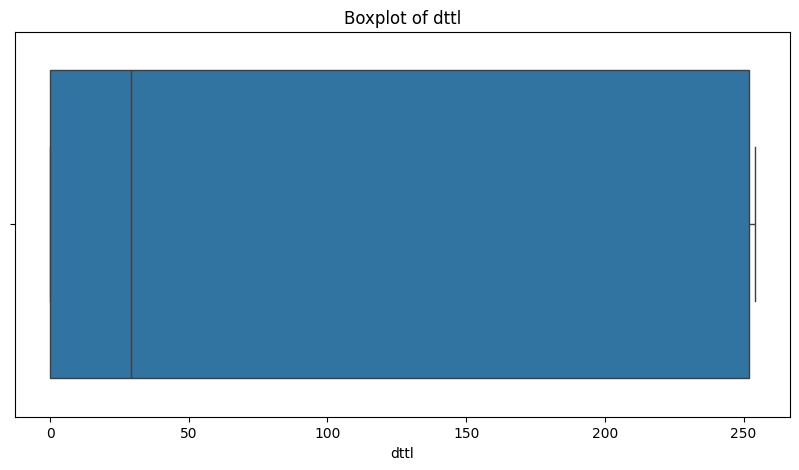

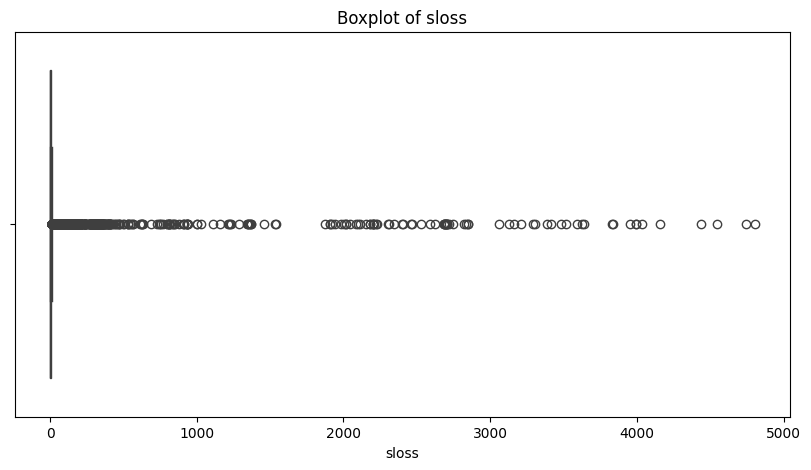

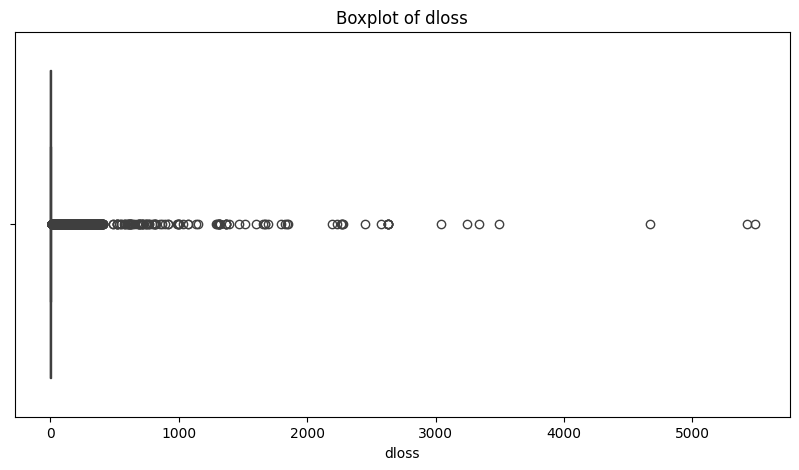

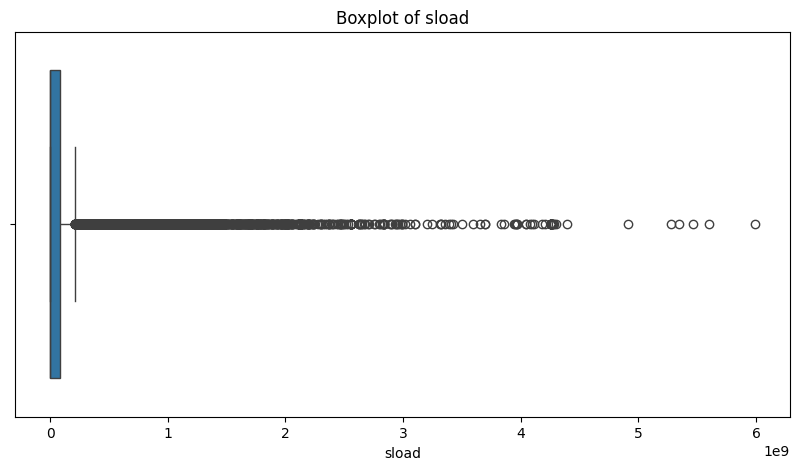

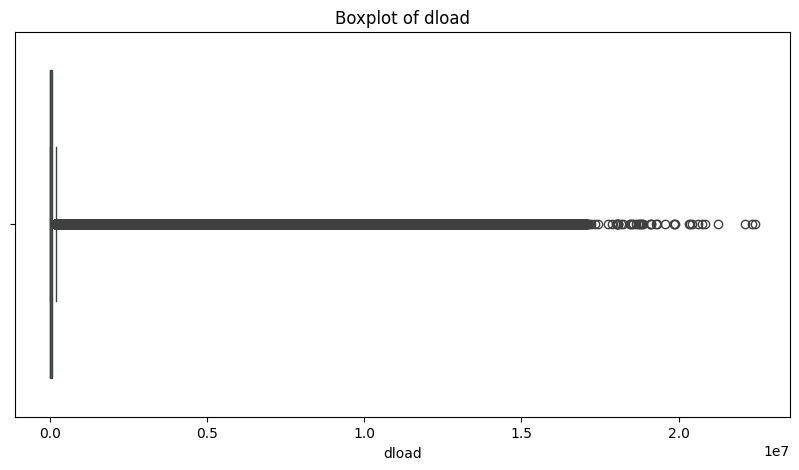

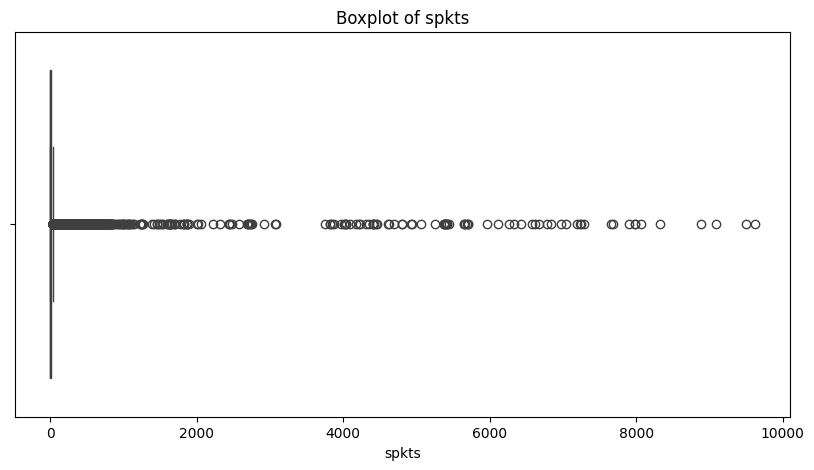

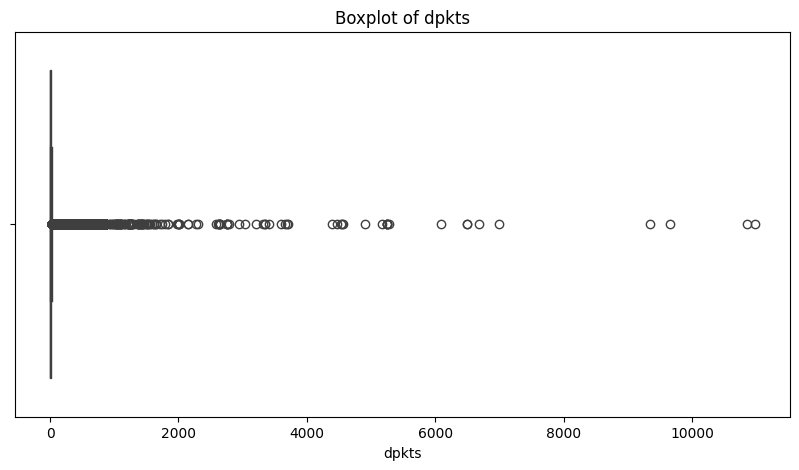

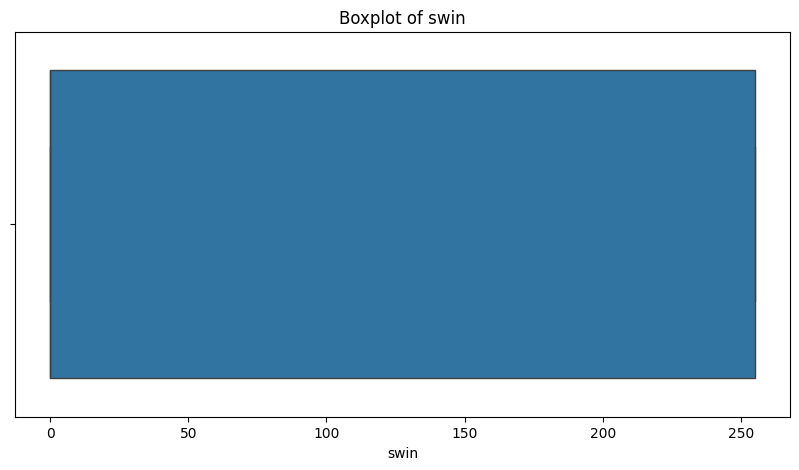

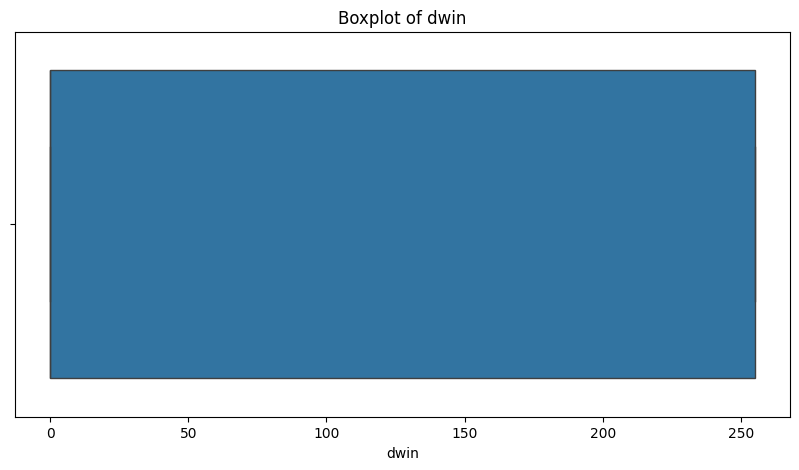

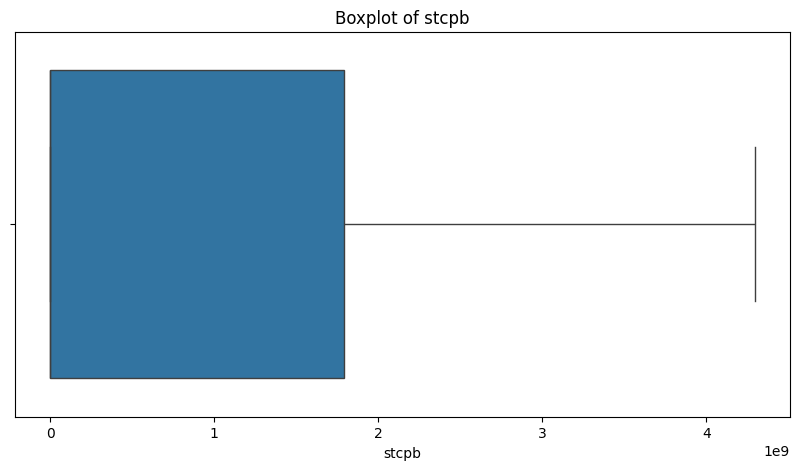

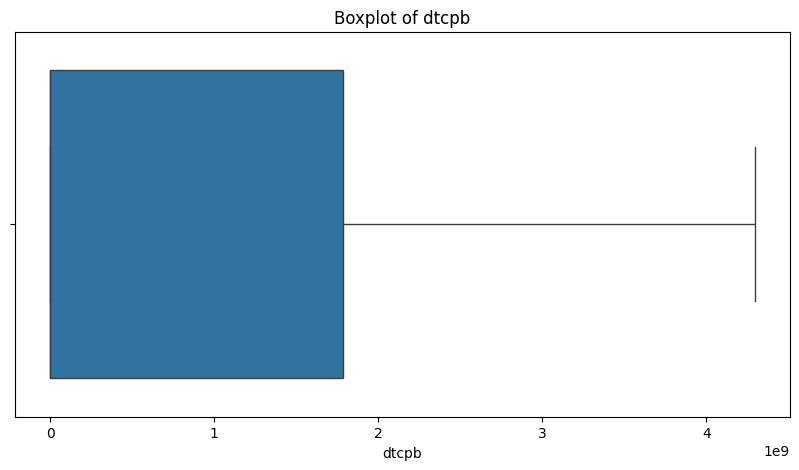

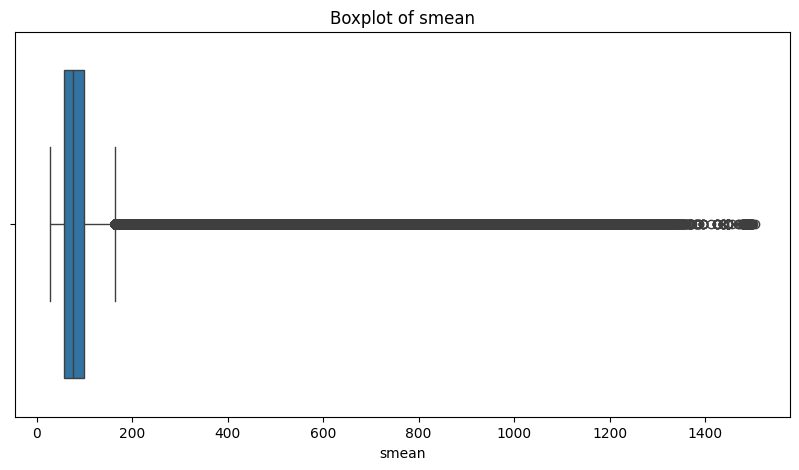

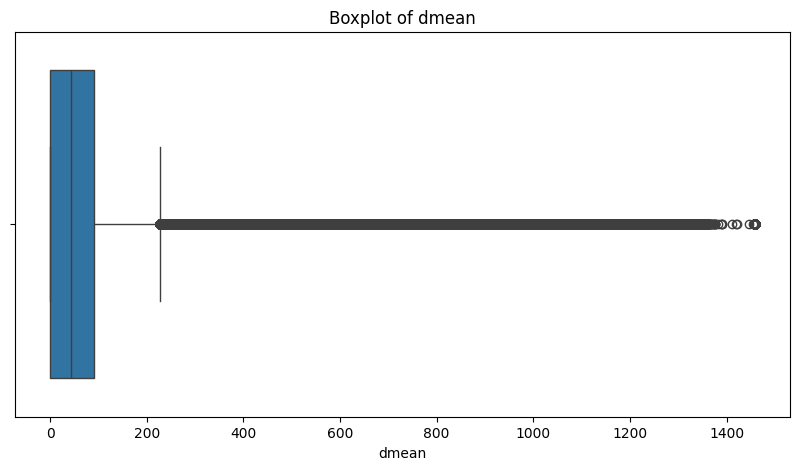

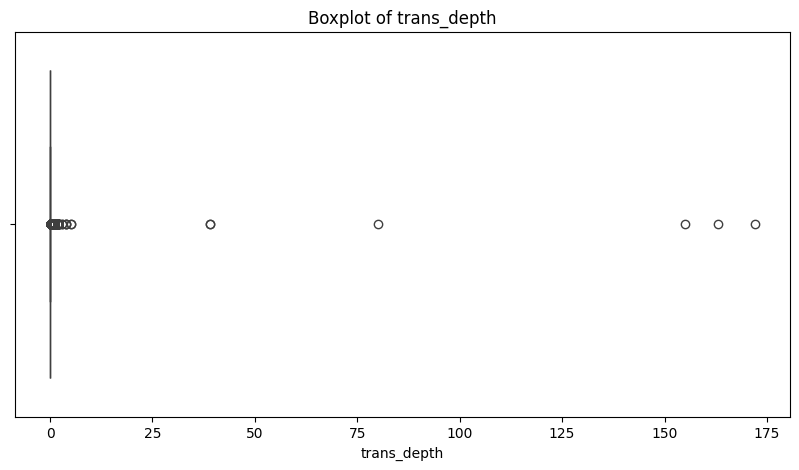

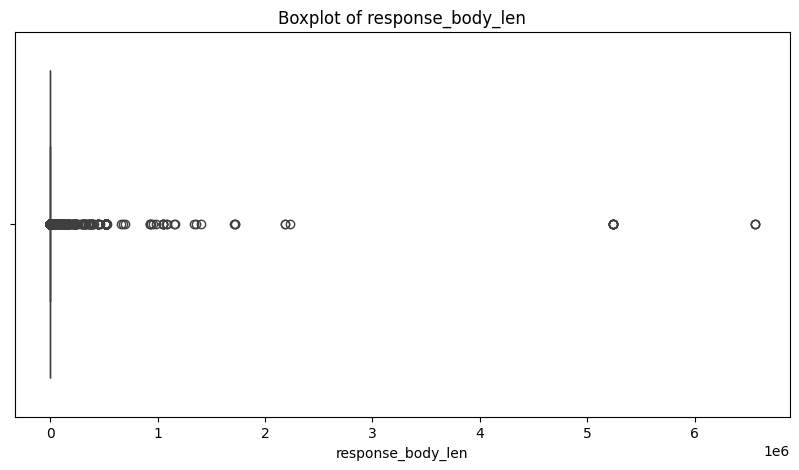

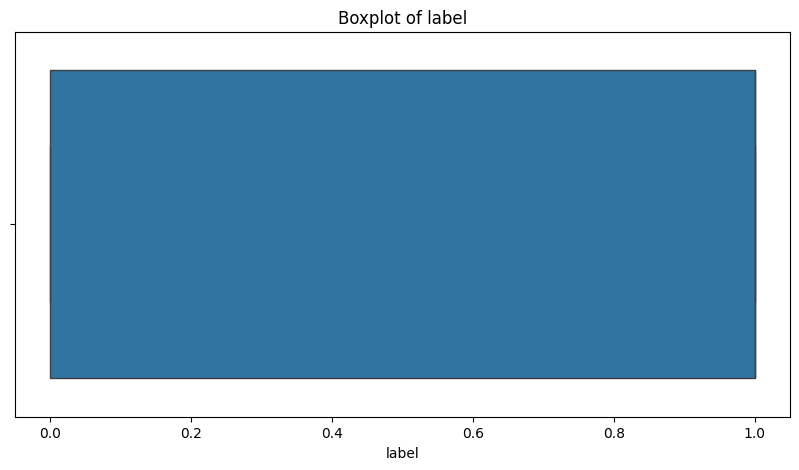

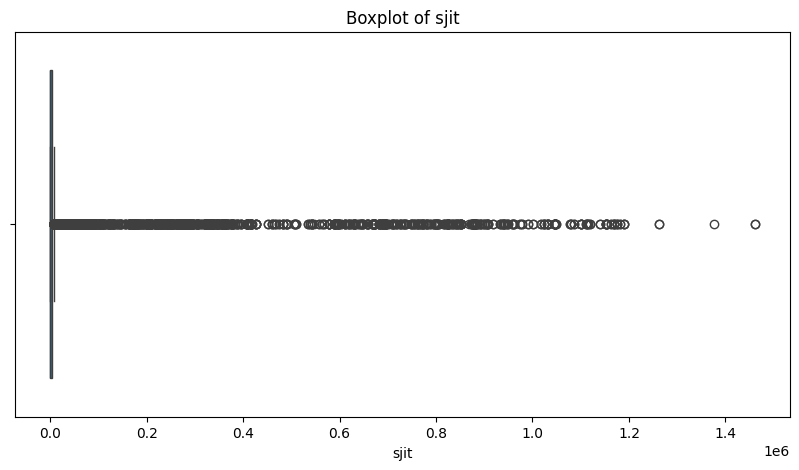

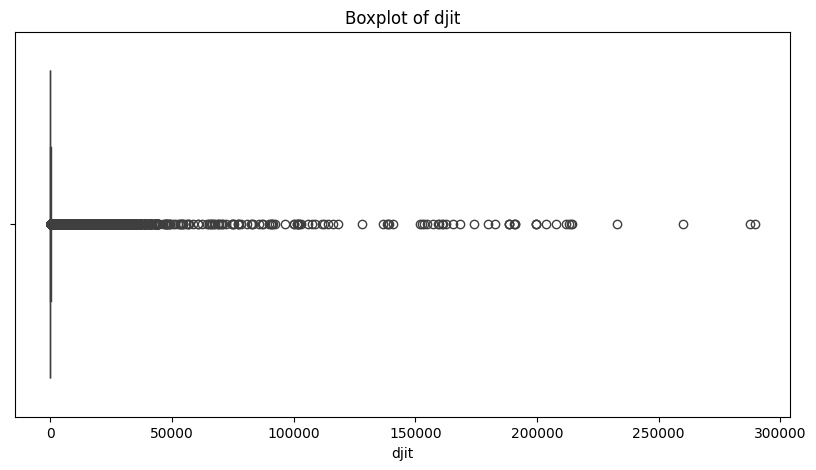

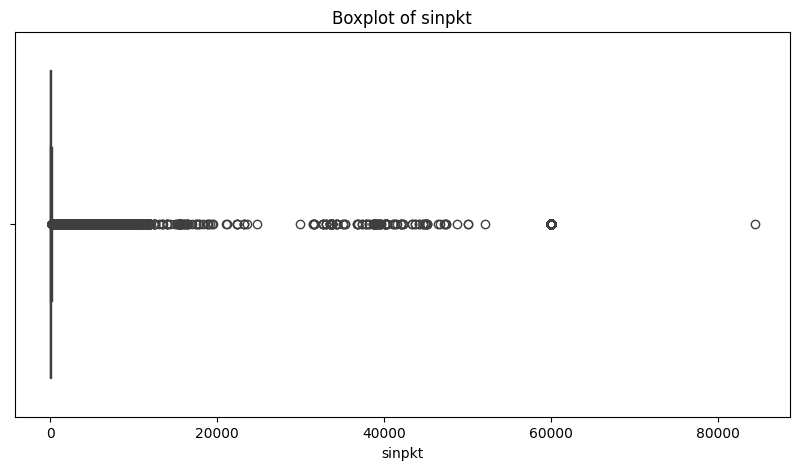

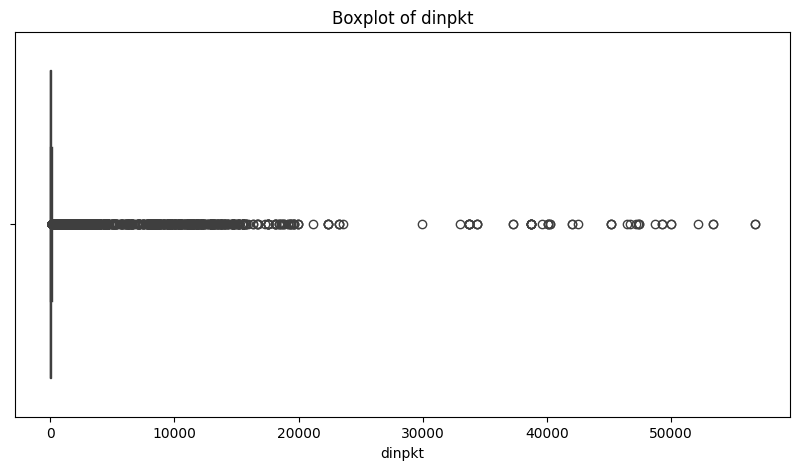

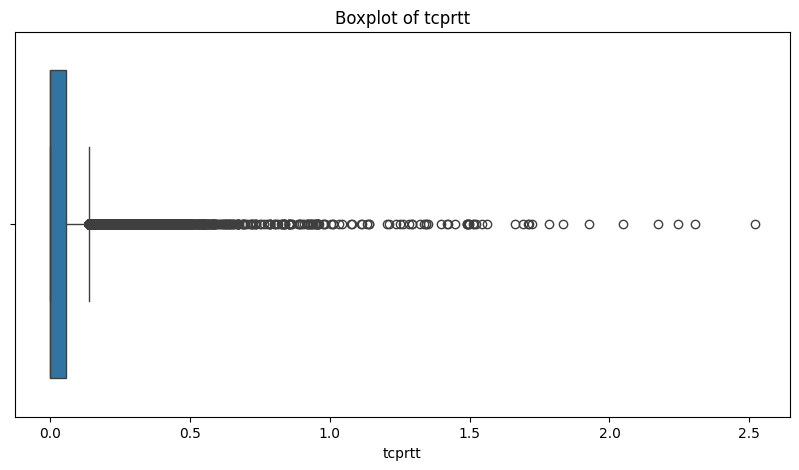

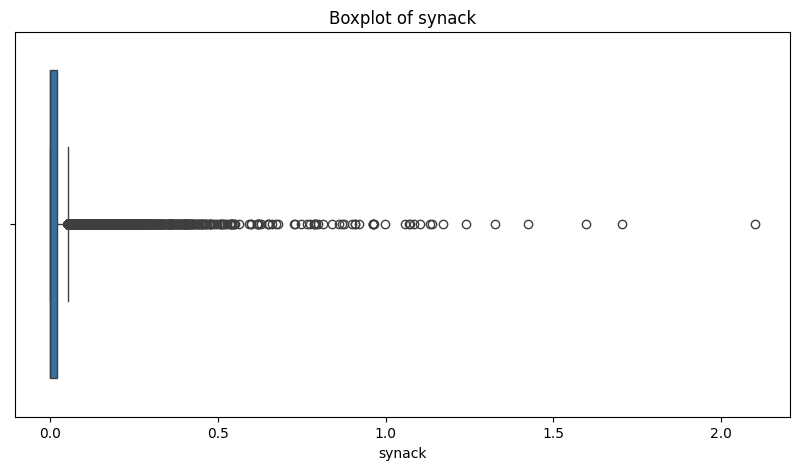

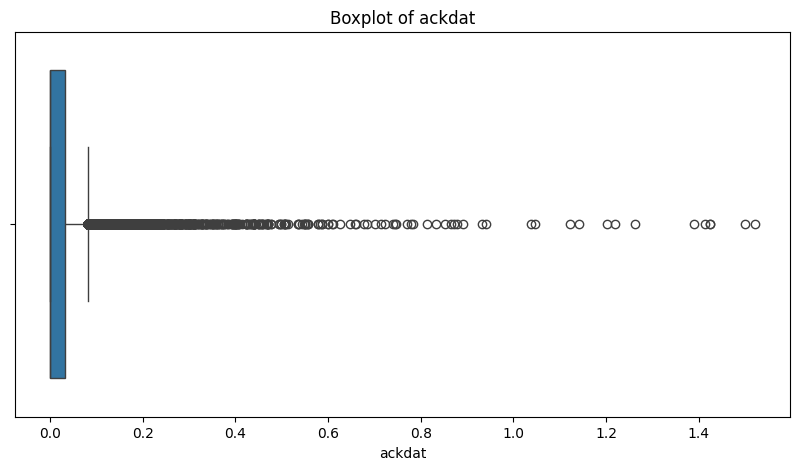

Outlier handling completed. Post-clipping descriptive statistics:
       is_sm_ips_ports   ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
count         175341.0  175341.000000          175341.0      175341.0   
mean               0.0       1.277646               0.0           0.0   
std                0.0       0.827889               0.0           0.0   
min                0.0       0.000000               0.0           0.0   
25%                0.0       1.000000               0.0           0.0   
50%                0.0       1.303852               0.0           0.0   
75%                0.0       2.000000               0.0           0.0   
max                0.0       3.500000               0.0           0.0   

       ct_ftp_cmd     ct_srv_src     ct_srv_dst     ct_dst_ltm     ct_src_ltm  \
count    175341.0  175341.000000  175341.000000  175341.000000  175341.000000   
mean          0.0       8.293490       8.095410       4.960133       6.046016   
std           0.0       8.084192 

In [29]:
# Detect and Handle Outliers

# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Boxplot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling Outliers: Clipping
# Define the clipping bounds for each numerical column
for col in numerical_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[col] = train[col].clip(lower=lower_bound, upper=upper_bound)

# Verify post-clipping results
print("Outlier handling completed. Post-clipping descriptive statistics:")
print(train[numerical_columns].describe())


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [30]:
# Remove Duplicates

# Check for duplicates
duplicate_count = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows
train_cleaned = train.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of rows after removing duplicates: {train_cleaned.shape[0]}")

# Optional: Save the cleaned dataset
# train_cleaned.to_csv("train_cleaned.csv", index=False)

# Number of duplicate rows: 0, so it's safe

Number of duplicate rows: 0
Number of rows after removing duplicates: 175341


In [31]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   is_sm_ips_ports    175341 non-null  float64
 1   ct_state_ttl       175341 non-null  float64
 2   ct_flw_http_mthd   175341 non-null  float64
 3   is_ftp_login       175341 non-null  float64
 4   ct_ftp_cmd         175341 non-null  float64
 5   ct_srv_src         175341 non-null  float64
 6   ct_srv_dst         175341 non-null  float64
 7   ct_dst_ltm         175341 non-null  float64
 8   ct_src_ltm         175341 non-null  float64
 9   ct_src_dport_ltm   175341 non-null  float64
 10  ct_dst_sport_ltm   175341 non-null  float64
 11  ct_dst_src_ltm     175341 non-null  float64
 12  id                 175341 non-null  int64  
 13  state              175341 non-null  object 
 14  dur                175341 non-null  float64
 15  sbytes             175341 non-null  float64
 16  db

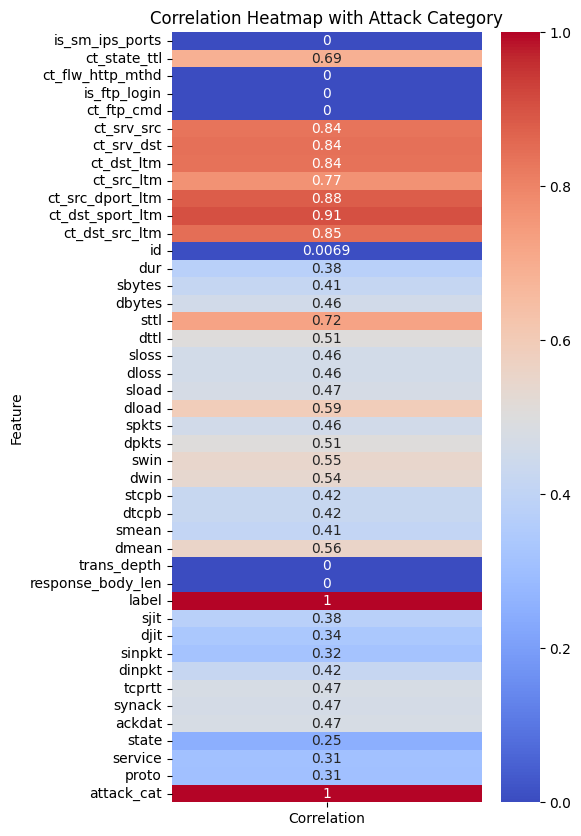

In [32]:
# Heatmap for recognizing correlation between each feature
import scipy.stats as ss
from sklearn import preprocessing

# Function correlation with eta square
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2
    return (ssb / (ssb + ssw))**.5

# Function correlation with chi square
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

correlation_map = {}

# Find correlation between target and numeric feature
numeric_columns = train_cleaned.select_dtypes(include=['int64', 'float64']).columns
for num_col in numeric_columns:
    if (train[num_col].std() != 0):
        correlation = correlation_ratio(train_cleaned['attack_cat'], train_cleaned[num_col])
        correlation_map[num_col] = correlation
    else:
        correlation_map[num_col] = 0
# Treshold = 0.1

# Find correlation between target and categorical feature
object_columns = train_cleaned.select_dtypes(include=['object']).columns
for obj_col in object_columns:
    confusion_matrix = pd.crosstab(train_cleaned['attack_cat'], train_cleaned[obj_col])
    correlation = cramers_v(confusion_matrix.values)
    correlation_map[obj_col] = correlation
# Treshold = 0.05

# Showing correlation as heatmap
correlation_df = pd.DataFrame(list(correlation_map.items()), columns=['Feature', 'Correlation'])

# Set the feature names as the index
correlation_df.set_index('Feature', inplace=True)

plt.figure(figsize=(5, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap with Attack Category')
plt.show()

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [49]:
# Step 1: Drop irrelevant columns
train_cleaned = train_cleaned.drop(columns=["id", "label"], errors='ignore')

# Drop categorical data with correlation < 0.05
for obj_col in object_columns:
    if (correlation_map[obj_col] < 0.05):
        train_cleaned = train_cleaned.drop(columns=[obj_col], errors="ignore")

# Drop numeric data with correlation < 0.1
for num_col in numeric_columns:
    if (correlation_map[num_col] < 0.05):
        train_cleaned = train_cleaned.drop(columns=[num_col], errors="ignore")

# Step 2: Create new interaction feature
if 'ct_src_ltm' in train_cleaned and 'ct_dst_ltm' in train_cleaned:
    train_cleaned['interaction_ct_ltm'] = train_cleaned['ct_src_ltm'] * train_cleaned['ct_dst_ltm']

# Step 3: Generate polynomial features for selected numerical columns
selected_columns = ['dur', 'sbytes', 'dbytes', 'spkts', 'dpkts']  # Example subset
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = pd.DataFrame(
    poly.fit_transform(train_cleaned[selected_columns].fillna(0)),
    columns=poly.get_feature_names_out(selected_columns)
)

# Join polynomial features with the original dataset
data_with_polynomials = train_cleaned.join(poly_features, rsuffix='_poly')

# Step 4: Binning a numerical column ('dur') into categories
if 'dur' in train_cleaned:
    bins = [-np.inf, 0, 10, 100, np.inf]
    labels = ['zero', 'short', 'medium', 'long']
    data_with_polynomials['dur_binned'] = pd.cut(data_with_polynomials['dur'], bins=bins, labels=labels)

# Step 5: Domain-specific feature engineering
# Create a binary column: 1 for attack, 0 for normal
if 'attack_cat' in data_with_polynomials:
    data_with_polynomials['is_attack'] = (data_with_polynomials['attack_cat'] != 'Normal').astype(int)

# Save the processed dataset
# data_with_polynomials.to_csv("train_cleaned_engineered.csv", index=False)

print("Feature engineering complete.")


Feature engineering complete.


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [34]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [56]:
# Write your code here
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        # Fit the scaler on numerical data
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(self.scaler.transform(X), columns=X.columns, index=X.index)
        return X_transformed

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse_output=False)

    def fit(self, X, y=None):
        # Fit the encoder on categorical data
        self.encoder.fit(X)
        return self

    def transform(self, X):
        encoded_data = self.encoder.transform(X)
        encoded_df = pd.DataFrame(
            encoded_data, 
            columns=self.encoder.get_feature_names_out(X.columns), 
            index=X.index
        )
        return encoded_df

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [37]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [39]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [40]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [41]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [42]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [43]:
# Type your code here

## B. Naive Bayes

In [82]:
import math
import random

def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata

def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

def groupUnderClass(mydata):
    data_dict = {}
    for i in range(len(mydata)):
        if mydata[i][-1] not in data_dict:
            data_dict[mydata[i][-1]] = []
        data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict

def MeanAndStdDev(numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

def MeanAndStdDevForClass(mydata):
    info = {}
    data_dict = groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
        info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info

def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

def accuracy_rate(test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

# Load data using pandas
mydata = train_cleaned.values.tolist()

# Encode classes and convert attributes to float
mydata = encode_class(mydata)
for i in range(len(mydata)):
    for j in range(len(mydata[i]) - 1):
        mydata[i][j] = float(mydata[i][j])

# Split the data into training and testing sets
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples:', len(mydata))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

# Train the model
info = MeanAndStdDevForClass(train_data)

# Test the model
predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Total number of examples: 175341
Training examples: 122738
Test examples: 52603


C:\Users\Amalia\AppData\Local\Temp\ipykernel_2788\2931201311.py:56: RuntimeWarning: overflow encountered in scalar multiply
  probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
C:\Users\Amalia\AppData\Local\Temp\ipykernel_2788\2931201311.py:56: RuntimeWarning: invalid value encountered in scalar multiply
  probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)


Accuracy of the model: 100.0
Predictions saved to 'submission.csv'


,Index,Prediction
count,52603.000000,52603.000000
mean,26301.000000,0.000646
std,15185.322442,0.025415
min,0.000000,0.000000
25%,13150.500000,0.000000
50%,26301.000000,0.000000
75%,39451.500000,0.000000
max,52602.000000,1.000000


## C. ID3

In [45]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [46]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`